<a href="https://colab.research.google.com/github/Abiramibeeyou/Exploratory-Data-Analysis/blob/main/module2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODULE 2 - DATA TRANSFORMATION

CO1: Handle missing data in the real world data sets by choosing appropriate methods.


Many beginner developers get confused when working with pandas dataframes, especially regarding when to use **append, concat, merge, or join**. Let's assume that you are working at a university as a professor teaching a Software Engineering course and an Introduction to Machine Learning course, and there are enough students to split into two classes. Checkout the following Screenshot.

In [49]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/txhousing.csv')
dff=pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/txhousing.csv')
df.head(10)

,rownames,city,year,month,sales,volume,median,listings,inventory,date
0,1,Abilene,2000,1,72.0,5380000.0,71400.0,701.0,6.3,2000.000000
1,2,Abilene,2000,2,98.0,6505000.0,58700.0,746.0,6.6,2000.083333
2,3,Abilene,2000,3,130.0,9285000.0,58100.0,784.0,6.8,2000.166667
3,4,Abilene,2000,4,98.0,9730000.0,68600.0,785.0,6.9,2000.250000
4,5,Abilene,2000,5,141.0,10590000.0,67300.0,794.0,6.8,2000.333333
5,6,Abilene,2000,6,156.0,13910000.0,66900.0,780.0,6.6,2000.416667
6,7,Abilene,2000,7,152.0,12635000.0,73500.0,742.0,6.2,2000.500000
7,8,Abilene,2000,8,131.0,10710000.0,75000.0,765.0,6.4,2000.583333
8,9,Abilene,2000,9,104.0,7615000.0,64500.0,771.0,6.5,2000.666667
9,10,Abilene,2000,10,101.0,7040000.0,59300.0,764.0,6.6,2000.750000


In [ ]:
#The structure of the dataframes is the same in both cases.
#In this case, we would need to concatenate them.
#We can do that by using the pandas concat() method
# In the dataset above, the first column contains information about student identifier and the second column contains their respective scores in any subject.
#The structure of the dataframes is same in the bothe case. In this case, we would need to concatenate both of them.
# We can do that by using Pandas concat() method.
#Output: A single dataframe combining both of the tables - ignore_index
#The ignore_index argument creates a new index


df1=df['listings'].head(10)
df2=df['inventory'].head(10)
dataframe = pd.concat([df1, df2], ignore_index=True)
dataframe

,0
0,701.0
1,746.0
2,784.0
3,785.0
4,794.0
5,780.0
6,742.0
7,765.0
8,771.0
9,764.0


In [ ]:
# if we want to combine them side by side
pd.concat([df1, df2], axis=1)

,listings,inventory
0,701.0,6.3
1,746.0,6.6
2,784.0,6.8
3,785.0,6.9
4,794.0,6.8
5,780.0,6.6
6,742.0,6.2
7,765.0,6.4
8,771.0,6.5
9,764.0,6.6


**Merging**

Now, consider another Listings and Inventory from our dataset




In [ ]:
# Option 1
df1listings = df[['rownames','listings']].head(10)
df2listings = df[['rownames','listings']].tail(10)
df1Inventory = df[['rownames','inventory']].head(8)
df2Inventory = df[['rownames','inventory']].tail(8)
dflistings= pd.concat([df1listings,df2listings],ignore_index=True)
dfInventory= pd.concat([df1Inventory,df2Inventory],ignore_index=True)
dfLI = pd.concat([dflistings,dfInventory],axis=1)
dfLI

,rownames,listings,rownames,inventory
0,1,701.0,1.0,6.3
1,2,746.0,2.0,6.6
2,3,784.0,3.0,6.8
3,4,785.0,4.0,6.9
4,5,794.0,5.0,6.8
5,6,780.0,6.0,6.6
6,7,742.0,7.0,6.2
7,8,765.0,8.0,6.4
8,9,771.0,8595.0,7.0
9,10,764.0,8596.0,7.2


In [ ]:
#Option 2
dfLI = dflistings.merge(dfInventory,how='inner')
dfLI
# Here, you will perform inner join with each dataframe. That is to say, if an item exists on the both dataframe, will be included in the new dataframe. This means, we will get the list of students who are appearing in both the courses.



,rownames,listings,inventory
0,1,701.0,6.3
1,2,746.0,6.6
2,3,784.0,6.8
3,4,785.0,6.9
4,5,794.0,6.8
5,6,780.0,6.6
6,7,742.0,6.2
7,8,765.0,6.4
8,8595,821.0,7.0
9,8596,829.0,7.2


In [ ]:
#Option 3
dfLI = dflistings.merge(dfInventory,how='left')
dfLI

,rownames,listings,inventory
0,1,701.0,6.3
1,2,746.0,6.6
2,3,784.0,6.8
3,4,785.0,6.9
4,5,794.0,6.8
5,6,780.0,6.6
6,7,742.0,6.2
7,8,765.0,6.4
8,9,771.0,NaN
9,10,764.0,NaN


In [ ]:
#option 4
dfLI = dflistings.merge(dfInventory,how='right')
dfLI

,rownames,listings,inventory
0,1,701.0,6.3
1,2,746.0,6.6
2,3,784.0,6.8
3,4,785.0,6.9
4,5,794.0,6.8
5,6,780.0,6.6
6,7,742.0,6.2
7,8,765.0,6.4
8,8595,821.0,7.0
9,8596,829.0,7.2


In [ ]:
#Add new colum that is the total price based on the quantity and the unit price
# ListingsPerMonth: The number of listings per month
df['ListingsPerMonth'] = df['listings'] / df['month']
df.head(10)

,rownames,city,year,month,sales,volume,median,listings,inventory,date,ListingsPerMonth
0,1,Abilene,2000,1,72.0,5380000.0,71400.0,701.0,6.3,2000.000000,701.000000
1,2,Abilene,2000,2,98.0,6505000.0,58700.0,746.0,6.6,2000.083333,373.000000
2,3,Abilene,2000,3,130.0,9285000.0,58100.0,784.0,6.8,2000.166667,261.333333
3,4,Abilene,2000,4,98.0,9730000.0,68600.0,785.0,6.9,2000.250000,196.250000
4,5,Abilene,2000,5,141.0,10590000.0,67300.0,794.0,6.8,2000.333333,158.800000
5,6,Abilene,2000,6,156.0,13910000.0,66900.0,780.0,6.6,2000.416667,130.000000
6,7,Abilene,2000,7,152.0,12635000.0,73500.0,742.0,6.2,2000.500000,106.000000
7,8,Abilene,2000,8,131.0,10710000.0,75000.0,765.0,6.4,2000.583333,95.625000
8,9,Abilene,2000,9,104.0,7615000.0,64500.0,771.0,6.5,2000.666667,85.666667
9,10,Abilene,2000,10,101.0,7040000.0,59300.0,764.0,6.6,2000.750000,76.400000


In [ ]:
df['city'].value_counts()

,count
city,
Abilene,187
Port Arthur,187
Lubbock,187
Lufkin,187
McAllen,187
Midland,187
Montgomery County,187
Nacogdoches,187
NE Tarrant County,187


In [ ]:
df.describe()

,rownames,year,month,sales,volume,median,listings,inventory,date,ListingsPerMonth
count,8602.000000,8602.000000,8602.000000,8034.000000,8.034000e+03,7986.000000,7178.000000,7135.000000,8602.000000,7178.000000
mean,4301.500000,2007.299465,6.406417,549.564600,1.068586e+08,128131.442524,3216.902340,7.174590,2007.750000,827.800005
std,2483.327841,4.502923,3.441932,1110.737179,2.449337e+08,37359.575317,5968.331072,4.612125,4.498718,2209.252344
min,1.000000,2000.000000,1.000000,6.000000,8.350000e+05,50000.000000,0.000000,0.000000,2000.000000,0.000000
25%,2151.250000,2003.000000,3.000000,86.000000,1.084000e+07,100000.000000,682.000000,4.900000,2003.833333,107.850000
50%,4301.500000,2007.000000,6.000000,169.000000,2.298682e+07,123800.000000,1283.000000,6.200000,2007.750000,251.657143
75%,6451.750000,2011.000000,9.000000,467.000000,7.512139e+07,150000.000000,2953.750000,8.150000,2011.666667,644.770833
max,8602.000000,2015.000000,12.000000,8945.000000,2.568157e+09,304200.000000,43107.000000,55.900000,2015.500000,39790.000000


**Reshaping with Hierarchical Indexing**


In [ ]:
import pandas as pd
import numpy as np
data = np.arange(15).reshape((3,5))
indexers = ['Speed', 'Altitude', 'Temperature']
dframe1 = pd.DataFrame(data, index=indexers, columns=['Falcon', 'Eagle', 'Hawk', 'Owl', 'Condor'])
dframe1




,Falcon,Eagle,Hawk,Owl,Condor
Speed,0,1,2,3,4
Altitude,5,6,7,8,9
Temperature,10,11,12,13,14


In [ ]:
stacked = dframe1.stack();
stacked

Speed        Falcon     0
             Eagle      1
             Hawk       2
             Owl        3
             Condor     4
Altitude     Falcon     5
             Eagle      6
             Hawk       7
             Owl        8
             Condor     9
Temperature  Falcon    10
             Eagle     11
             Hawk      12
             Owl       13
             Condor    14
dtype: int64

In [ ]:
stacked.unstack()

,Falcon,Eagle,Hawk,Owl,Condor
Speed,0,1,2,3,4
Altitude,5,6,7,8,9
Temperature,10,11,12,13,14


TRANSFORMATION TECHNIQUES

06-Jan-2025

Data deduplication

In the Merging database-style dataframes section, we saw how we can merge different types of series and dataframes. Now, let's dive more into how we can perform other types of data transformations including **cleaning, filtering, deduplication**, and others.

In [ ]:
#Performing data deduplication
#1. Let's consider a simple dataframe, as follows:
#2. The pandas dataframe comes with a duplicated() method that returns a Boolean series stating which of the rows are duplicates:

df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
8597,False
8598,False
8599,False
8600,False


In [ ]:
#3. Now, we can drop these duplicates using the drop_duplicates() method:
dataframe = df.drop_duplicates()
dataframe

,rownames,city,year,month,sales,volume,median,listings,inventory,date
0,1,Abilene,2000,1,72.0,5380000.0,71400.0,701.0,6.3,2000.000000
1,2,Abilene,2000,2,98.0,6505000.0,58700.0,746.0,6.6,2000.083333
2,3,Abilene,2000,3,130.0,9285000.0,58100.0,784.0,6.8,2000.166667
3,4,Abilene,2000,4,98.0,9730000.0,68600.0,785.0,6.9,2000.250000
4,5,Abilene,2000,5,141.0,10590000.0,67300.0,794.0,6.8,2000.333333
...,...,...,...,...,...,...,...,...,...,...
8597,8598,Wichita Falls,2015,3,152.0,16716584.0,89200.0,818.0,6.8,2015.166667
8598,8599,Wichita Falls,2015,4,129.0,15482194.0,105300.0,760.0,6.4,2015.250000
8599,8600,Wichita Falls,2015,5,174.0,19188181.0,100000.0,776.0,6.4,2015.333333
8600,8601,Wichita Falls,2015,6,143.0,18820752.0,118800.0,770.0,6.2,2015.416667


In [ ]:
#4. Let's add a new column and try to find duplicated items based on the second column:
dataframe = df.drop_duplicates(['city'])
dataframe

,rownames,city,year,month,sales,volume,median,listings,inventory,date
0,1,Abilene,2000,1,72.0,5380000.0,71400.0,701.0,6.3,2000.0
187,188,Amarillo,2000,1,102.0,8860000.0,80000.0,972.0,5.3,2000.0
374,375,Arlington,2000,1,241.0,26220683.0,94000.0,1417.0,3.7,2000.0
561,562,Austin,2000,1,1025.0,173053635.0,133700.0,3084.0,2.0,2000.0
748,749,Bay Area,2000,1,244.0,29322659.0,100700.0,1766.0,4.3,2000.0
935,936,Beaumont,2000,1,97.0,10100000.0,82100.0,876.0,6.1,2000.0
1122,1123,Brazoria County,2000,1,55.0,5245000.0,74400.0,512.0,5.9,2000.0
1309,1310,Brownsville,2000,1,NaN,NaN,NaN,400.0,9.1,2000.0
1496,1497,Bryan-College Station,2000,1,61.0,5615000.0,77900.0,498.0,4.2,2000.0
1683,1684,Collin County,2000,1,464.0,94788821.0,158700.0,2844.0,4.0,2000.0


2. Replacing Values


In [ ]:
#find and replace some values inside a dataframE
df['month'].replace(to_replace=1,value=2)

,month
0,2
1,2
2,3
3,4
4,5
...,...
8597,3
8598,4
8599,5
8600,6


In [ ]:
#Two or More replacements.
df.replace(to_replace=[2,3],value=[1,2])

,rownames,city,year,month,sales,volume,median,listings,inventory,date
0,1,Abilene,2000,1,72.0,5380000.0,71400.0,701.0,6.3,2000.000000
1,1,Abilene,2000,1,98.0,6505000.0,58700.0,746.0,6.6,2000.083333
2,2,Abilene,2000,2,130.0,9285000.0,58100.0,784.0,6.8,2000.166667
3,4,Abilene,2000,4,98.0,9730000.0,68600.0,785.0,6.9,2000.250000
4,5,Abilene,2000,5,141.0,10590000.0,67300.0,794.0,6.8,2000.333333
...,...,...,...,...,...,...,...,...,...,...
8597,8598,Wichita Falls,2015,2,152.0,16716584.0,89200.0,818.0,6.8,2015.166667
8598,8599,Wichita Falls,2015,4,129.0,15482194.0,105300.0,760.0,6.4,2015.250000
8599,8600,Wichita Falls,2015,5,174.0,19188181.0,100000.0,776.0,6.4,2015.333333
8600,8601,Wichita Falls,2015,6,143.0,18820752.0,118800.0,770.0,6.2,2015.416667


3**.HANDLING MISSING DATA**

Whenever there are missing values, a NaN value is used, which indicates that there is no value specified for that particular index. There could be several reasons why a value could be NaN:

It can happen when data is retrieved from an external source and there are some incomplete values in the dataset.
It can also happen when we join two different datasets and some values are not matched.
Missing values due to data collection errors.
When the shape of data changes, there are new additional rows or columns that are not determined.
Reindexing of data can result in incomplete data.


In [ ]:
#Note the following characteristics of missing values in the preceding dataframe:
#An entire row can contain NaN values.
#An entire column can contain NaN values.
#Some (but not necessarily all) values in both a row and a column can be NaN.
#NaN values in pandas objects
#1. Check the following example:
df.isnull()

,rownames,city,year,month,sales,volume,median,listings,inventory,date
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8597,False,False,False,False,False,False,False,False,False,False
8598,False,False,False,False,False,False,False,False,False,False
8599,False,False,False,False,False,False,False,False,False,False
8600,False,False,False,False,False,False,False,False,False,False


In [ ]:
#2. check it out in action:
df.notnull()

,rownames,city,year,month,sales,volume,median,listings,inventory,date
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
8597,True,True,True,True,True,True,True,True,True,True
8598,True,True,True,True,True,True,True,True,True,True
8599,True,True,True,True,True,True,True,True,True,True
8600,True,True,True,True,True,True,True,True,True,True


In [ ]:
#3. We can use the sum() method to count the number of NaN values in each store.
df.isnull().sum()

,0
rownames,0
city,0
year,0
month,0
sales,568
volume,568
median,616
listings,1424
inventory,1467
date,0


In [ ]:
#4. We can go one level deeper to find the total number of missing values
df.isnull().sum().sum()


4643

In [ ]:
#5. So, instead of counting the number of missing values, we can count the number of reported values:
df.count()

,0
rownames,8602
city,8602
year,8602
month,8602
sales,8034
volume,8034
median,7986
listings,7178
inventory,7135
date,8602


4**. Dropping missing values**

One of the ways to handle missing values is to simply remove them from our dataset. We have seen that we can use the isnull() and notnull() functions from the pandas library to determine null values



In [ ]:
df.sales[df.sales.notnull()]

,sales
0,72.0
1,98.0
2,130.0
3,98.0
4,141.0
...,...
8597,152.0
8598,129.0
8599,174.0
8600,143.0


In [50]:
df.sales.dropna()
#Note that the dropna() method just returns a copy of the dataframe by dropping the rows with NaN.



,sales
0,72.0
1,98.0
2,130.0
3,98.0
4,141.0
...,...
8597,152.0
8598,129.0
8599,174.0
8600,143.0


In [ ]:
#If dropna() is applied to the entire dataframe, then it will drop all the rows from the dataframe, because there is at least one NaN value in our dataframe:
df.dropna()

,rownames,city,year,month,sales,volume,median,listings,inventory,date
0,1,Abilene,2000,1,72.0,5380000.0,71400.0,701.0,6.3,2000.000000
1,2,Abilene,2000,2,98.0,6505000.0,58700.0,746.0,6.6,2000.083333
2,3,Abilene,2000,3,130.0,9285000.0,58100.0,784.0,6.8,2000.166667
3,4,Abilene,2000,4,98.0,9730000.0,68600.0,785.0,6.9,2000.250000
4,5,Abilene,2000,5,141.0,10590000.0,67300.0,794.0,6.8,2000.333333
...,...,...,...,...,...,...,...,...,...,...
8597,8598,Wichita Falls,2015,3,152.0,16716584.0,89200.0,818.0,6.8,2015.166667
8598,8599,Wichita Falls,2015,4,129.0,15482194.0,105300.0,760.0,6.4,2015.250000
8599,8600,Wichita Falls,2015,5,174.0,19188181.0,100000.0,776.0,6.4,2015.333333
8600,8601,Wichita Falls,2015,6,143.0,18820752.0,118800.0,770.0,6.2,2015.416667


In [ ]:
#####Dropping by rows
#We can also drop rows that have NaN values. To do so, we can use the how=all argument to drop only those rows entire values are entirely NaN:
df.dropna(how='all')

,rownames,city,year,month,sales,volume,median,listings,inventory,date
0,1,Abilene,2000,1,72.0,5380000.0,71400.0,701.0,6.3,2000.000000
1,2,Abilene,2000,2,98.0,6505000.0,58700.0,746.0,6.6,2000.083333
2,3,Abilene,2000,3,130.0,9285000.0,58100.0,784.0,6.8,2000.166667
3,4,Abilene,2000,4,98.0,9730000.0,68600.0,785.0,6.9,2000.250000
4,5,Abilene,2000,5,141.0,10590000.0,67300.0,794.0,6.8,2000.333333
...,...,...,...,...,...,...,...,...,...,...
8597,8598,Wichita Falls,2015,3,152.0,16716584.0,89200.0,818.0,6.8,2015.166667
8598,8599,Wichita Falls,2015,4,129.0,15482194.0,105300.0,760.0,6.4,2015.250000
8599,8600,Wichita Falls,2015,5,174.0,19188181.0,100000.0,776.0,6.4,2015.333333
8600,8601,Wichita Falls,2015,6,143.0,18820752.0,118800.0,770.0,6.2,2015.416667


In [ ]:


#Dropping by columns
#Furthermore, we can also pass axis=1 to indicate a check for NaN by columns.
df.dropna(how='all', axis=1)

,rownames,city,year,month,sales,volume,median,listings,inventory,date
0,1,Abilene,2000,1,72.0,5380000.0,71400.0,701.0,6.3,2000.000000
1,2,Abilene,2000,2,98.0,6505000.0,58700.0,746.0,6.6,2000.083333
2,3,Abilene,2000,3,130.0,9285000.0,58100.0,784.0,6.8,2000.166667
3,4,Abilene,2000,4,98.0,9730000.0,68600.0,785.0,6.9,2000.250000
4,5,Abilene,2000,5,141.0,10590000.0,67300.0,794.0,6.8,2000.333333
...,...,...,...,...,...,...,...,...,...,...
8597,8598,Wichita Falls,2015,3,152.0,16716584.0,89200.0,818.0,6.8,2015.166667
8598,8599,Wichita Falls,2015,4,129.0,15482194.0,105300.0,760.0,6.4,2015.250000
8599,8600,Wichita Falls,2015,5,174.0,19188181.0,100000.0,776.0,6.4,2015.333333
8600,8601,Wichita Falls,2015,6,143.0,18820752.0,118800.0,770.0,6.2,2015.416667


In [ ]:
#we can also pass another argument, thresh, to specify a minimum number of NaNs that must exist before the column should be dropped:
df.dropna(thresh=5, axis=1)

,rownames,city,year,month,sales,volume,median,listings,inventory,date
0,1,Abilene,2000,1,72.0,5380000.0,71400.0,701.0,6.3,2000.000000
1,2,Abilene,2000,2,98.0,6505000.0,58700.0,746.0,6.6,2000.083333
2,3,Abilene,2000,3,130.0,9285000.0,58100.0,784.0,6.8,2000.166667
3,4,Abilene,2000,4,98.0,9730000.0,68600.0,785.0,6.9,2000.250000
4,5,Abilene,2000,5,141.0,10590000.0,67300.0,794.0,6.8,2000.333333
...,...,...,...,...,...,...,...,...,...,...
8597,8598,Wichita Falls,2015,3,152.0,16716584.0,89200.0,818.0,6.8,2015.166667
8598,8599,Wichita Falls,2015,4,129.0,15482194.0,105300.0,760.0,6.4,2015.250000
8599,8600,Wichita Falls,2015,5,174.0,19188181.0,100000.0,776.0,6.4,2015.333333
8600,8601,Wichita Falls,2015,6,143.0,18820752.0,118800.0,770.0,6.2,2015.416667


In [ ]:
#Mathematical operations with NaN
ar1=dff['volume'].to_numpy()
ser1=dff['volume']
ar1.mean(),ser1.mean()

(nan, 106858620.78080657)

Note the following things:

When a ** NumPy** function encounters NaN values, it returns NaN.
Pandas, on the other hand, ignores the NaN values and moves ahead with processing. When performing the sum operation, NaN is treated as 0. If all the values are NaN, the result is also NaN.

In [ ]:
#Let's compute the Total Volume
ser2=dff.volume
ser2.sum()

858502159353.0

In [ ]:
#Average
ser2.mean()

106858620.78080657

In [ ]:
#cumulative Summing
ser2.cumsum()

,volume
0,5.380000e+06
1,1.188500e+07
2,2.117000e+07
3,3.090000e+07
4,4.149000e+07
...,...
8597,8.584248e+11
8598,8.584403e+11
8599,8.584595e+11
8600,8.584783e+11


**5.Filling Missing values**

In [ ]:
#We can use the fillna() method to replace NaN values with any particular values.
filledDf=df.fillna(0)
filledDf

,rownames,city,year,month,sales,volume,median,listings,inventory,date
0,1,Abilene,2000,1,72.0,5380000.0,71400.0,701.0,6.3,2000.000000
1,2,Abilene,2000,2,98.0,6505000.0,58700.0,746.0,6.6,2000.083333
2,3,Abilene,2000,3,130.0,9285000.0,58100.0,784.0,6.8,2000.166667
3,4,Abilene,2000,4,98.0,9730000.0,68600.0,785.0,6.9,2000.250000
4,5,Abilene,2000,5,141.0,10590000.0,67300.0,794.0,6.8,2000.333333
...,...,...,...,...,...,...,...,...,...,...
8597,8598,Wichita Falls,2015,3,152.0,16716584.0,89200.0,818.0,6.8,2015.166667
8598,8599,Wichita Falls,2015,4,129.0,15482194.0,105300.0,760.0,6.4,2015.250000
8599,8600,Wichita Falls,2015,5,174.0,19188181.0,100000.0,776.0,6.4,2015.333333
8600,8601,Wichita Falls,2015,6,143.0,18820752.0,118800.0,770.0,6.2,2015.416667


In [ ]:
#Check the difference in the following between NaN and NA filling
df['sales'].mean()

549.5646004480956

In [ ]:
filledDf['sales'].mean()

513.2762148337596

In [51]:
#Backward and forward filling
#forward-filling - method = ffill
df.sales.fillna(method='ffill')

<ipython-input-51-dd7a6a69969f>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.sales.fillna(method='ffill')


,sales
0,72.0
1,98.0
2,130.0
3,98.0
4,141.0
...,...
8597,152.0
8598,129.0
8599,174.0
8600,143.0


In [ ]:
df.sales.fillna(method='bfill')

<ipython-input-74-0c91b74eee7c>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.sales.fillna(method='bfill')


,sales
0,72.0
1,98.0
2,130.0
3,98.0
4,141.0
...,...
8597,152.0
8598,129.0
8599,174.0
8600,143.0


**DISCRETIZATION AND BINNING **

Often when working with continuous datasets, we need to convert them into discrete or interval forms.
Each interval is referred to as a bin, and hence the name binning comes into play


In [ ]:
sales=df['sales'].head(20)
sales

,sales
0,72.0
1,98.0
2,130.0
3,98.0
4,141.0
5,156.0
6,152.0
7,131.0
8,104.0
9,101.0


In [ ]:
#To convert the preceding dataset into intervals, we can use the cut() method from pandas
bins = [70, 99, 129, 149, 160]
category =pd.cut(sales,bins)
category

,sales
0,"(70, 99]"
1,"(70, 99]"
2,"(129, 149]"
3,"(70, 99]"
4,"(129, 149]"
5,"(149, 160]"
6,"(149, 160]"
7,"(129, 149]"
8,"(99, 129]"
9,"(99, 129]"


In [ ]:
#We can check the number of values in each bin by using the pd.value_counts() method
pd.value_counts(category)

<ipython-input-83-7a767266afe9>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(category)


,count
sales,
"(99, 129]",6
"(70, 99]",5
"(129, 149]",5
"(149, 160]",4


In [ ]:
#We can also indicate the bin names by passing a list of label
bin_names=['Low Sales','Moderate Sales','High Sales','Very High sales']
pd.cut(sales, bins, labels=bin_names)

,sales
0,Low Sales
1,Low Sales
2,High Sales
3,Low Sales
4,High Sales
5,Very High sales
6,Very High sales
7,High Sales
8,Moderate Sales
9,Moderate Sales


In [ ]:
#it is essential to note that if we pass just an integer for our bins,
#it will compute equal-length bins based on the minimum and maximum values in the data.
import numpy as np
#print(np.random.rand(40))  #Random numbers between 0 to 1
pd.cut(np.random.rand(40), 5, precision=2)

[(0.8, 1.0], (0.21, 0.4], (0.4, 0.6], (0.8, 1.0], (0.21, 0.4], ..., (0.0074, 0.21], (0.21, 0.4], (0.21, 0.4], (0.0074, 0.21], (0.8, 1.0]]
Length: 40
Categories (5, interval[float64, right]): [(0.0074, 0.21] < (0.21, 0.4] < (0.4, 0.6] < (0.6, 0.8] <
                                           (0.8, 1.0]]

In [ ]:
#Panda provides a qcut method that forms the bins based on sample quantiles
randomNumbers = np.random.rand(2000)
category3 = pd.qcut(randomNumbers, 4) # cut into quartiles
category3

[(0.514, 0.767], (0.767, 0.999], (0.514, 0.767], (0.767, 0.999], (0.767, 0.999], ..., (0.767, 0.999], (-0.0009043, 0.267], (0.267, 0.514], (0.767, 0.999], (0.767, 0.999]]
Length: 2000
Categories (4, interval[float64, right]): [(-0.0009043, 0.267] < (0.267, 0.514] < (0.514, 0.767] <
                                           (0.767, 0.999]]

In [ ]:

#Based on the number of bins, which we set to 4, it converted our data into four different categories.
#If we count the number of values in each category, we should get equal-sized bins as per our definition.
pd.value_counts(category3)

<ipython-input-86-71f9c193185e>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(category3)


,count
"(-0.0009043, 0.267]",500
"(0.267, 0.514]",500
"(0.514, 0.767]",500
"(0.767, 0.999]",500


**Outlier detection and filtering**

Outliers are data points that diverge from other observations for several reasons.

During the EDA phase, one of our common tasks is to detect and filter these outliers.

The main reason for this detection and filtering of outliers is that the presence of such outliers can cause serious issues in statistical analysis.

In [ ]:
#suppose we want to calculate the total price based on the Sales and the Volume.
df['TotalPrice'] = df['sales'] * df['listings']
df

,rownames,city,year,month,sales,volume,median,listings,inventory,date,TotalPrice
0,1,Abilene,2000,1,72.0,5380000.0,71400.0,701.0,6.3,2000.000000,50472.0
1,2,Abilene,2000,2,98.0,6505000.0,58700.0,746.0,6.6,2000.083333,73108.0
2,3,Abilene,2000,3,130.0,9285000.0,58100.0,784.0,6.8,2000.166667,101920.0
3,4,Abilene,2000,4,98.0,9730000.0,68600.0,785.0,6.9,2000.250000,76930.0
4,5,Abilene,2000,5,141.0,10590000.0,67300.0,794.0,6.8,2000.333333,111954.0
...,...,...,...,...,...,...,...,...,...,...,...
8597,8598,Wichita Falls,2015,3,152.0,16716584.0,89200.0,818.0,6.8,2015.166667,124336.0
8598,8599,Wichita Falls,2015,4,129.0,15482194.0,105300.0,760.0,6.4,2015.250000,98040.0
8599,8600,Wichita Falls,2015,5,174.0,19188181.0,100000.0,776.0,6.4,2015.333333,135024.0
8600,8601,Wichita Falls,2015,6,143.0,18820752.0,118800.0,770.0,6.2,2015.416667,110110.0


In [ ]:
#Let's find the transaction that exceeded 3,000,000:
TotalTransaction = df["TotalPrice"]
TotalTransaction[np.abs(TotalTransaction) > 3000000]

,TotalPrice
561,3161100.0
562,3816953.0
563,4876326.0
564,4966752.0
565,7161660.0
...,...
6914,18192480.0
6915,20550600.0
6916,22625292.0
6917,26577495.0


INTRODUCING CORRELATION'



*   Any dataset that we want to
analyze will have different fields (that is, columns) of multiple observations (that is, variables) representing different facts.

*  The columns of a dataset are, most probably, related to one another because they are collected from the same event.
One field of record may or may not affect the value of another field.
*  To examine the type of relationships these columns have and to analyze the causes and effects between them, we have to work to find the dependencies that exist among variables.

* The strength of such a relationship between two fields of a dataset is called correlation, which is represented by a numerical value between -1 and 1.

* Scatter plots show how much one variable is affected by another:




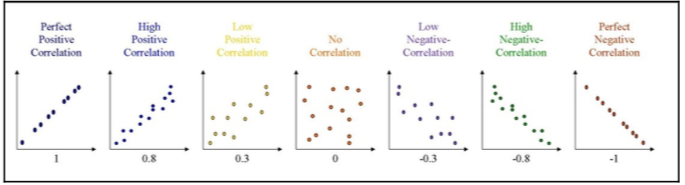

**Types of Analysis**

1.**Univariate Analysis** - Mainly for Description

2.**Bivariate Analysis **-
Determining the empirical relationship between the two variables.

3.**Multivariate Analysis** -
Determining the empirical relationship among multiple variables.

**Univariate analysis**

*   Analysis on a single type of dataset is called univariate analysis.
*   Simplest form of analyzing data: Data has only one type of variable.

*   The main purpose of univariate analysis is to take data, summarize that data, and find patterns among the values.

*  Several techniques that describe the patterns found in univariate data

   *   Central tendency: the mean, mode, and median.
   *   Dispersion: the range, variance, maximum and minimum quartiles

   * Interquartile range and standard deviation








In [ ]:
#Measures of central tendency
#Mean/average
#Median
#Mode

#Measures of dispersion
#Standard deviation
#The standard deviation is the average/mean of the difference between each value in the dataset
#with its average/mean; that is, how data is spread out from the mean.
#If the standard deviation of the dataset is low, then the data points tend to be close to the mean of the dataset,
#otherwise, the data points are spread out over a wider range of values.

#Variance
#Variance is the square of the average/mean of the difference between each value in the dataset with its average/mean;
#that is, it is the square of standard deviation.

In [4]:
#1. Start by importing the required libraries and loading the dataset:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [29]:

#2. Load the dataset and Display First and Last 3 rows of the dataset
dtf=pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/txhousing.csv")
print(dtf.head(3))
print(dtf.tail(3))

   rownames     city  year  month  sales     volume   median  listings  \
0         1  Abilene  2000      1   72.0  5380000.0  71400.0     701.0   
1         2  Abilene  2000      2   98.0  6505000.0  58700.0     746.0   
2         3  Abilene  2000      3  130.0  9285000.0  58100.0     784.0   

   inventory         date  
0        6.3  2000.000000  
1        6.6  2000.083333  
2        6.8  2000.166667  
      rownames           city  year  month  sales      volume    median  \
8599      8600  Wichita Falls  2015      5  174.0  19188181.0  100000.0   
8600      8601  Wichita Falls  2015      6  143.0  18820752.0  118800.0   
8601      8602  Wichita Falls  2015      7  172.0  23850905.0  116700.0   

      listings  inventory         date  
8599     776.0        6.4  2015.333333  
8600     770.0        6.2  2015.416667  
8601     811.0        6.5  2015.500000  


In [7]:
#3. Check the data types of each column
dtf.dtypes

,0
rownames,int64
city,object
year,int64
month,int64
sales,float64
volume,float64
median,float64
listings,float64
inventory,float64
date,float64


In [9]:
#5. Find the descriptive Statistics of the entire dataset
print(dtf.describe())
pd.isna(dtf).any()

          rownames         year        month        sales        volume  \
count  8602.000000  8602.000000  8602.000000  8034.000000  8.034000e+03   
mean   4301.500000  2007.299465     6.406417   549.564600  1.068586e+08   
std    2483.327841     4.502923     3.441932  1110.737179  2.449337e+08   
min       1.000000  2000.000000     1.000000     6.000000  8.350000e+05   
25%    2151.250000  2003.000000     3.000000    86.000000  1.084000e+07   
50%    4301.500000  2007.000000     6.000000   169.000000  2.298682e+07   
75%    6451.750000  2011.000000     9.000000   467.000000  7.512139e+07   
max    8602.000000  2015.000000    12.000000  8945.000000  2.568157e+09   

              median      listings    inventory         date  
count    7986.000000   7178.000000  7135.000000  8602.000000  
mean   128131.442524   3216.902340     7.174590  2007.750000  
std     37359.575317   5968.331072     4.612125     4.498718  
min     50000.000000      0.000000     0.000000  2000.000000  
25%    10

,0
rownames,False
city,False
year,False
month,False
sales,True
volume,True
median,True
listings,True
inventory,True
date,False


**DATA CLEANING**

In [19]:
# Find out the number of values which are not numeric
dtf['sales'].str.isnumeric().value_counts()

,count
sales,
False,8602


In [24]:
# List out the values which are not numeric
dtf['sales'].str.replace('.', '', regex=False).str.isnumeric()



,sales
0,True
1,True
2,True
3,True
4,True
...,...
8597,True
8598,True
8599,True
8600,True


In [31]:
#6. compute the measure of central tendency of the height column.
#Descriptive Statistics
#Calculate mean, median and mode of dat set height

mean = dtf["sales"].mean()
median =dtf["sales"].median()
mode = dtf["sales"].mode()
print(mean , median, mode)

549.5646004480956 169.0 0    68.0
1    77.0
Name: sales, dtype: float64


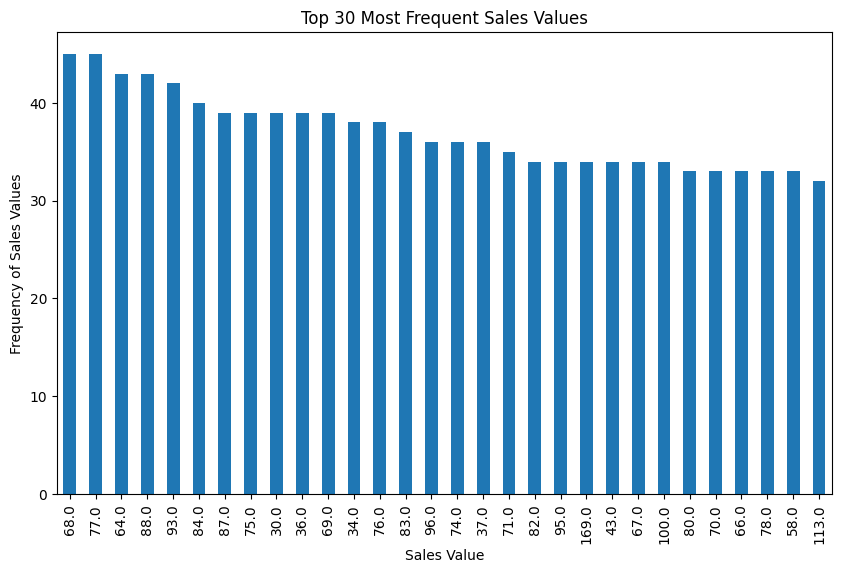

In [34]:
#7. First 30 largest values and draw a bar chart
dtf.sales.value_counts().nlargest(30).plot(kind='bar', figsize=(10,6))
plt.xlabel("Sales Value")
plt.ylabel("Frequency of Sales Values")
plt.title("Top 30 Most Frequent Sales Values")
plt.show()


**UNIVARIATE ANALYSIS**

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


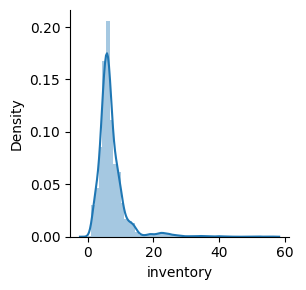

In [38]:
#8. Distribution plot
sns.FacetGrid(dtf).map(sns.distplot,"inventory").add_legend()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


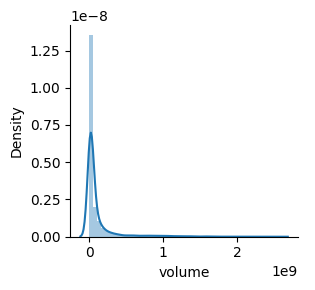

In [39]:
#distribution plot
sns.FacetGrid(dtf).map(sns.distplot,"volume").add_legend()

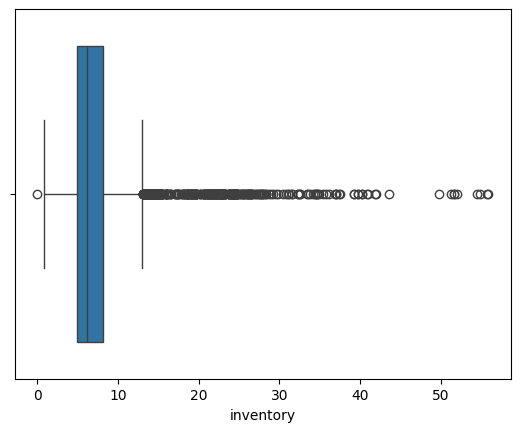

In [43]:
#boxplot for price of cars
sns.boxplot(x="inventory",data=dtf)
plt.show()


*  The right border of the box is Q3, that is, the third quartile, and the left border of the box is Q1, that is, the first quartile.
*   Lines extend from both sides of the box boundaries toward the minimum and maximum. *Based on the convention that our plotting tool uses, though, they may only extend to a certain statistic; any values beyond these statistics are marked as outliers (using points)


**BIVARIATE ANALYSIS**



*  The analysis of more than one (that is, exactly two) type of variable.

*   Bivariate analysis is used to find out whether there is a relationship between two different variables.

*  Generally, bivariate analysis helps us to predict a value for one variable (that is, a dependent variable) if we are aware of the value of the independent variable.

*   The scatter plot for bivariate analysis, where Sales and Advertising Dollars are two variables.


*   While plotting a scatter plot, we can see that the sales values are dependent on the advertising dollars; that is, as the advertising dollars increase, the sales values also increase.









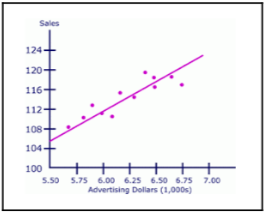

Text(0, 0.5, 'volume')

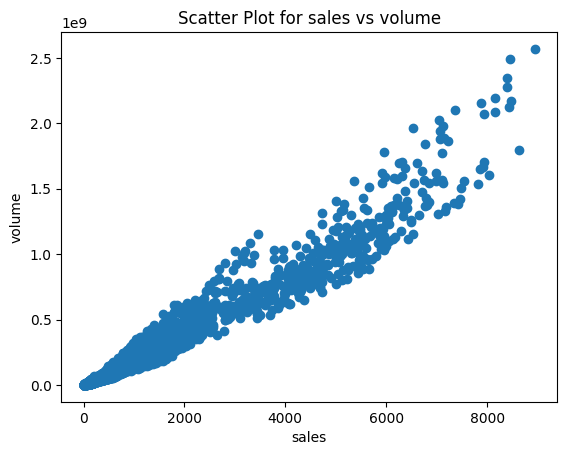

In [45]:


#1. To perform bivariate analysis on our dataset.
#Let's look at whether sales is a dependent factor for the volume of our household dataset or not
#Plot the relationship between “sales” and ”volume”
plt.scatter(dtf["sales"], dtf["volume"])
plt.title("Scatter Plot for sales vs volume")
plt.xlabel("sales")
plt.ylabel("volume")

In [55]:

#Relationshipt between two features (Positive Correlation)
dtf['sales']=dtf['sales'].fillna(0)
dtf['volume']=dtf['volume'].fillna(0)
np.corrcoef(dtf["sales"], dtf["volume"])

array([[1.        , 0.98121379],
       [0.98121379, 1.        ]])

In [56]:
#Relationshipt between two features (Negative Correlation)
dtf['sales']=dtf['sales'].fillna(0)
np.corrcoef(dtf["sales"], dtf["rownames"])

array([[ 1.        , -0.19840293],
       [-0.19840293,  1.        ]])

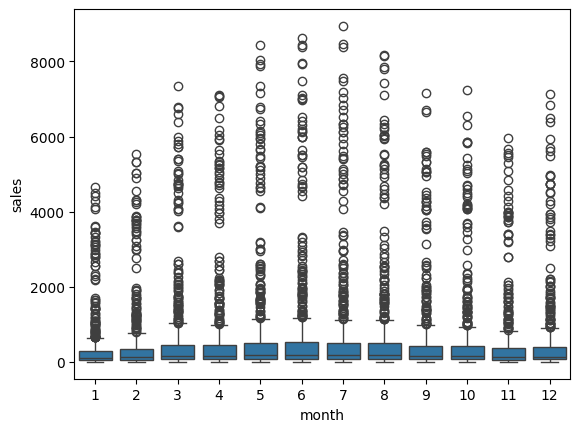

In [57]:
#2. Draw a box plot between the sales and month

sns.boxplot(x="month",y="sales",data=dtf)
plt.show()

<Axes: xlabel='month', ylabel='inventory'>

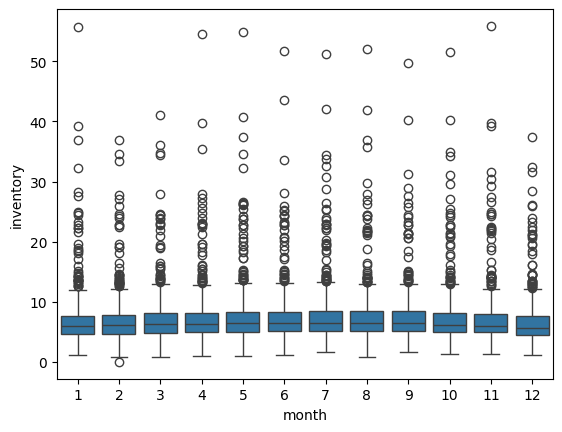

In [60]:


#3. Plot another box plot with the sales and the driver wheel type
#boxplot to visualize the distribution of "price" with types of  "drive-wheels"
sns.boxplot(x="month", y="inventory",data=dtf)



**Multivariate Analysis**


*   Multivariate analysis is the analysis of three or more variables.

*   This allows us to look at correlations (that is, how one variable changes with respect to another) and attempt to make predictions for future behavior more accurately than with bivariate analysis.

*  One common way of plotting multivariate data is to make a matrix scatter plot, known as a pair plot.
*   A matrix plot or pair plot shows each pair of variables plotted against each other.


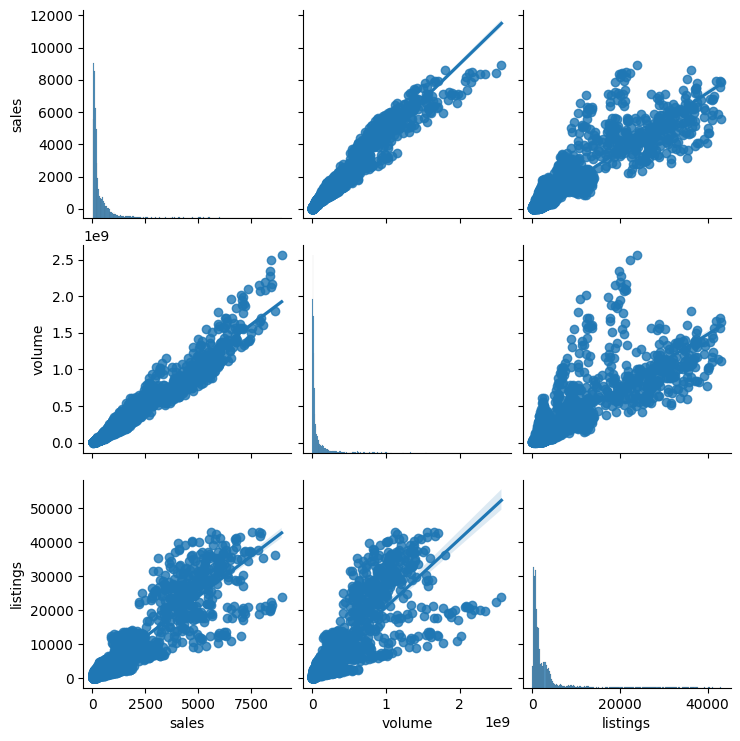

In [61]:
#1. 1. We can use the scatter_matrix() function from the pandas.tools.plotting package or
# the seaborn.pairplot() function from the seaborn package to do this:
# pair plot with plot type regression

# pair plot with plot type regression
sns.pairplot(df,vars = ['sales', 'volume','listings'], kind="reg")
plt.show()


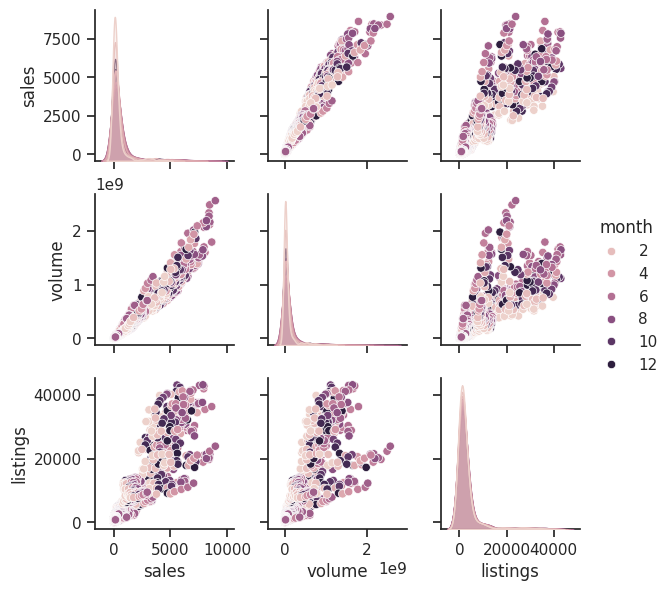

In [63]:

#2. A pair plot by specifying the colors, labels, plot type, diagonal plot type, and variables.
#pair plot (matrix scatterplot) of few columns
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,height=2,vars = ['sales', 'volume','listings'], hue="month")
plt.show()


In [ ]:

#The density plots on the diagonal allow us to see the distribution of a single variable,
#while the scatter plots on the upper and lower triangles show the relationship (or correlation) between two variables.
#The hue parameter is the column name used for the labels of the data points;
#in this diagram, the drivewheels type is labeled by color.
#The left-most plot in the second row shows the scatter plot of normalized-losses versus wheel-base.


In [65]:
#3. To calculate the correlation coefficient for the sales and volume,
from scipy import stats

corr = stats.pearsonr(dtf["sales"], dtf["volume"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 0.0
cor:		 0.9812137924655193


In [66]:
# To find the correlation among the entire numerical records
# the columns using pearson method
correlation = dtf.corr(method='pearson', numeric_only=True)
correlation

,rownames,year,month,sales,volume,median,listings,inventory,date
rownames,1.000000,0.021695,0.000374,-0.198403,-0.196247,-0.185070,-0.161183,0.152642,0.021739
year,0.021695,1.000000,-0.046502,0.041608,0.097315,0.499707,-0.051756,0.097672,0.997970
month,0.000374,-0.046502,1.000000,0.014423,0.015242,0.038996,0.006089,0.014757,0.017212
sales,-0.198403,0.041608,0.014423,1.000000,0.981214,0.345001,0.921468,-0.192857,0.042567
volume,-0.196247,0.097315,0.015242,0.981214,1.000000,0.408361,0.860905,-0.194223,0.098378
median,-0.185070,0.499707,0.038996,0.345001,0.408361,1.000000,0.245101,-0.142189,0.502748
listings,-0.161183,-0.051756,0.006089,0.921468,0.860905,0.245101,1.000000,-0.100157,-0.051411
inventory,0.152642,0.097672,0.014757,-0.192857,-0.194223,-0.142189,-0.100157,1.000000,0.098680
date,0.021739,0.997970,0.017212,0.042567,0.098378,0.502748,-0.051411,0.098680,1.000000


<Axes: >

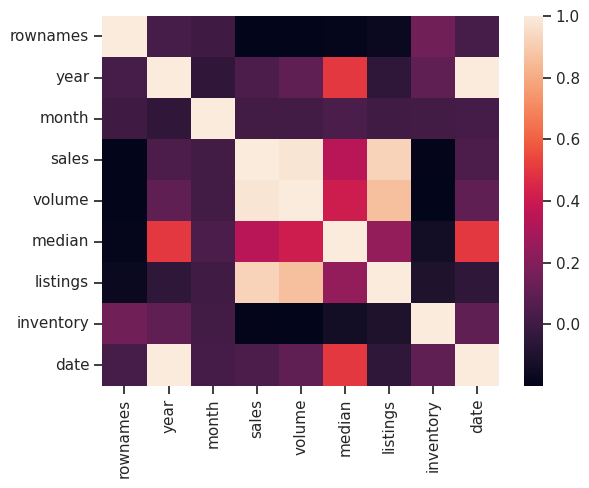

In [67]:

#5. Visualize this correlation analysis using a heatmap.
#A heatmap is the best technique to make this look beautiful and easier to interpret:
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns)

In [ ]:
#A coefficient close to 1 means that there's a very strong positive correlation between the two variables.
#The diagonal line is the correlation of the variables to themselves – so they'll, of course, be 1.